## En este NoteBook inspeccionaremos los valores de las variables, cuantificaremos valores faltantes, determinaremos cardinalidades e identificaremos categorias raras.

In [1]:
#Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargando los datos

data = pd.read_csv('/home/ia/cursoECI/cursoIV/Datasets/raw/titanic.csv')
#Preview 
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Examinando los tipos de variables
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
data.shape

(1309, 14)

### Inspeccionando Valores

In [6]:
# inspecciona valores únicos Variable discreta
data['pclass'].unique()

array([1, 2, 3])

In [8]:
# Variable continua
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [9]:
# Variable categórica
data.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [10]:
# Variable mezclada
data['cabin'].unique()[0:20]

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T'],
      dtype=object)

### Plots - Visualizaciones

<Axes: >

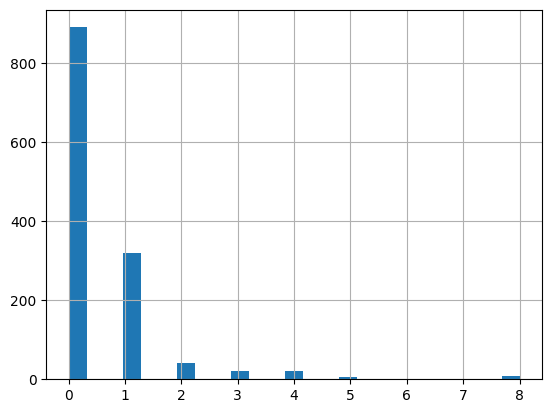

In [11]:
data['sibsp'].hist(bins=25)

<Axes: >

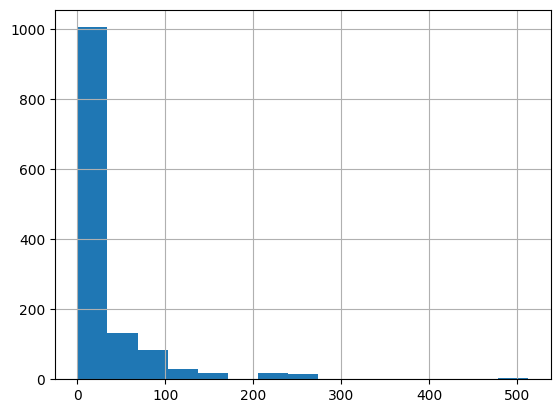

In [13]:
# Histograma de Variable continua

data['fare'].hist(bins=15)

Text(0.5, 1.0, 'embakred - port')

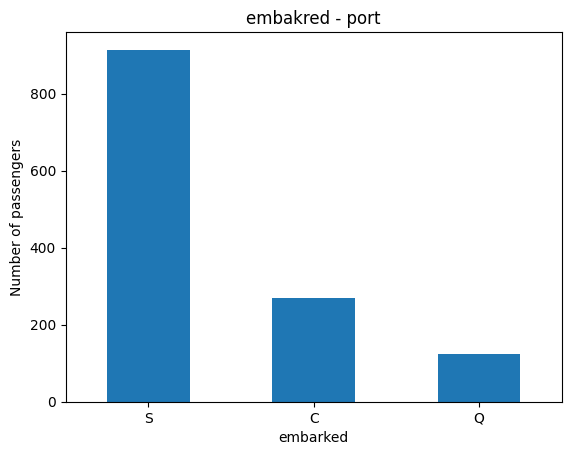

In [14]:
# bar plots para variables categóricas

data['embarked'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('embakred - port')

### Cuantificando valores faltantes

Text(0.5, 1.0, 'Datos faltantes')

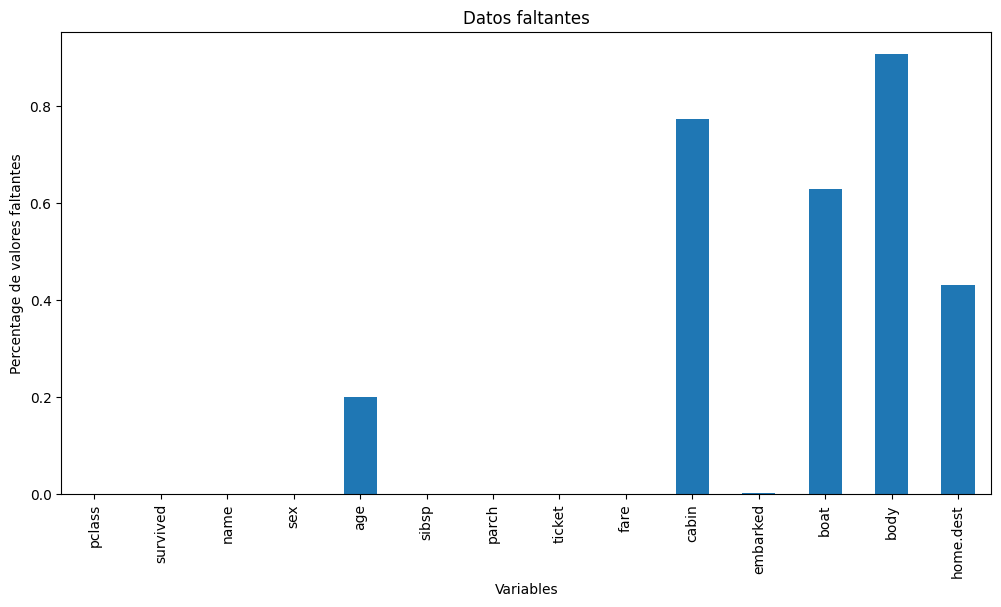

In [15]:
data.isnull().sum()

# Alternativamente podemos usar mean() con isnull() para visualizar el porcentaje de varoleres faltantes en cada variable
data.isnull().mean()

# Podemos tambien graficar el porcentaje de valores faltantes con 
# pandas plot.bar()

data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage de valores faltantes')
plt.xlabel('Variables')
plt.title('Datos faltantes')

### Determinando cardinalidad

In [16]:
# Con el siguiente comando aprendemos la cardinalidad de cada variable

data.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         181
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [17]:
# nunique() ignora datos faltantes por default. 
# Considerando valores faltantes como una categoria adicional pasamos el argumento
# dropna=False

data.nunique(dropna=False)

pclass          3
survived        2
name         1307
sex             2
age            99
sibsp           7
parch           8
ticket        929
fare          282
cabin         182
embarked        4
boat           28
body          122
home.dest     370
dtype: int64

Text(0.5, 1.0, 'Cardinality')

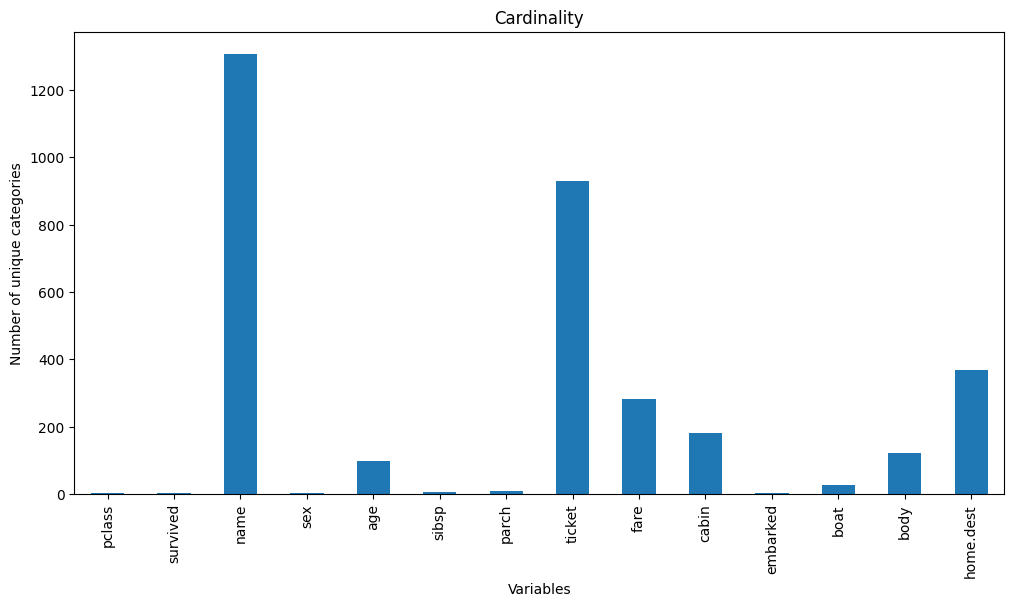

In [18]:
# Grafiquemos la cardinalidad de las variables 

data.nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [19]:
data[['age', 'parch']].nunique()

age      98
parch     8
dtype: int64

### Identificando categorias raras

In [21]:
# Encontremos la cardinalidad de las variables
# el número de categorías únicas

data['boat'].nunique()

27

In [22]:
# inspeccionemos el nombre de las categorías
data['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [23]:
data['boat'].value_counts()

boat
13         39
C          38
15         37
14         33
4          31
10         29
5          27
3          26
9          25
11         25
16         23
8          23
7          23
D          20
6          20
12         19
2          13
A          11
B           9
1           5
5 7         2
C D         2
13 15       2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: count, dtype: int64

In [24]:
# Calculemos la frecuencia para cada categoría
label_freq = data['boat'].value_counts() / len(data)

# Inspeccionemos la frecuencia de las etiquetas
label_freq

boat
13         0.029794
C          0.029030
15         0.028266
14         0.025210
4          0.023682
10         0.022154
5          0.020626
3          0.019862
9          0.019099
11         0.019099
16         0.017571
8          0.017571
7          0.017571
D          0.015279
6          0.015279
12         0.014515
2          0.009931
A          0.008403
B          0.006875
1          0.003820
5 7        0.001528
C D        0.001528
13 15      0.001528
5 9        0.000764
8 10       0.000764
13 15 B    0.000764
15 16      0.000764
Name: count, dtype: float64

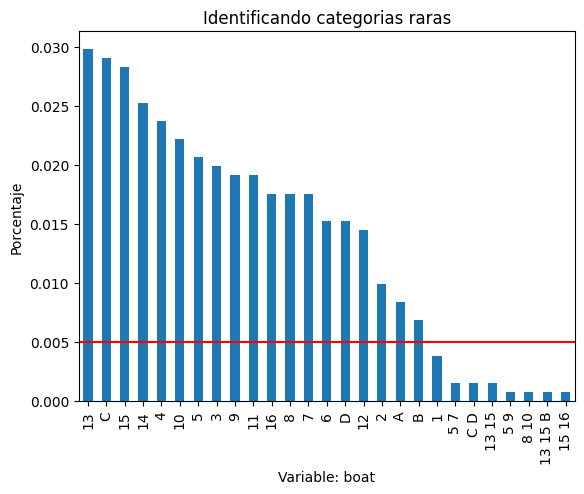

In [26]:
# Hagamos una gráfica con la fecuencia de las categorias
fig = label_freq.sort_values(ascending=False).plot.bar()

# Linea bajo la cual consideraremos una categoría como rara
fig.axhline(y=0.005, color='red')

fig.set_ylabel('Porcentaje')
fig.set_xlabel('Variable: boat')
fig.set_title('Identificando categorias raras')
plt.show()